In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from PSyn import matrix_functions
from PSyn import brain
import os
import time
SOURCE_DATA_PATH = 'data/task1/dev/'
from collections import Counter

In [9]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='decision_tree', random_test=True)
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

polish-train-high
Total Alphabets:
{'u', 'h', 's', 'ś', 'z', 'R', 'i', 'ó', 'ź', 'B', 'j', 'd', 'ę', 'w', 't', 'C', 'm', 'G', 'l', 'o', 'r', 'k', 'n', ' ', 'c', 'e', 'ą', 'ż', 'W', 'a', 'f', 'g', 'M', 'ń', 'Ż', 'ł', 'p', 'y', 'ć', 'b'}
Epsilon: 9.000000
Ci: 40.000000


/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaurav/python-scripts/py/scripts/pg_project/BTP-ProgSyn/program_synthesis/PSyn/brain.py:399: RuntimeWarning: divide by zero encountered in true_divide
  fF = 2 / np.sum(1/np.array([pP, rR]))
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ones and zeros 164 12887
Macro PRF:
Guessed 149 inflections correctly out of 421.
Accuracy: 35.391924


In [ ]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='random_forest')
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

In [3]:
global_attr

0.7339667458432304

In [4]:
source_csv = open('data/task1/dev/polish-dev', 'r')
dict_for_df = {'source': [], 'target': [], 'source_node': [], 'pos': []}
content = source_csv.readlines()
for line in content:
    row = line.split('\t')
    dict_for_df['source'].append(row[0])
    dict_for_df['target'].append(row[1])
    dict_for_df['source_node'].append(
        row[0] + '-' + row[2].strip().replace(';', '_'))
    dict_for_df['pos'].append(row[2].split(';')[0])
source_df = pd.DataFrame.from_records(dict_for_df)
source_df = source_df[source_df['pos'] == 'N']
idx = source_df.index[source_df['source_node'] == 'Cezar-N_DAT_PL']
list(source_df.loc[idx]['target'])

['Cezarom']

In [5]:
o = pd.DataFrame.from_dict(correct_inflections)
ops_ = {}
for key in o.columns.values:
    ops_[key] = []
    for i, _ in enumerate(o[key]):
        if _:
            ops_[key].append(o[key].index.values[i])
t = []
for s_node in list(ops_.keys()):
    idx = source_df.index[source_df['source_node'] == s_node]
    t.append(list(source_df.loc[idx]['target'])[0])
pd.DataFrame.from_dict({'source': list(ops_.keys()), 'opn_sequence': list(ops_.values()), 'target': t})

,opn_sequence,source,target
0,"[ins_m_7_1, ins_o_6_0]",Cezar-N_DAT_PL,Cezarom
1,"[del_a_9_-1, del_k_8_-2, ins_c_8_-2, ins_e_9_-1]",Greczynka-N_ESS_SG,Greczynce
2,"[del_n_9_-1, ins_e_9_-1]",Marsjanin-N_VOC_PL,Marsjanie
3,[ins_a_10_0],Rzymianin-N_GEN_SG,Rzymianina
4,"[del_e_5_-2, del_i_4_-3, del_r_6_-1, ins_r_4_-...",Węgier-N_GEN_PL,Węgrów
5,"[ins_c_9_0, ins_h_10_1]",Węgierka-N_ESS_PL,Węgierkach
6,"[del_a_9_-1, ins_ę_9_-1]",abdykacja-N_ACC_SG,abdykację
7,"[del_o_8_-1, del_ł_7_-2, ins_e_8_-1, ins_l_7_-2]",abecadło-N_ESS_SG,abecadle
8,"[ins_m_12_1, ins_o_11_0]",abiturient-N_DAT_PL,abiturientom
9,"[del_a_7_-1, ins_i_7_-1]",aborcja-N_GEN_SG,aborcji


In [6]:
prf_values = list(prf.values())
prf_keys = list(prf.keys())
prf_df = pd.DataFrame.from_dict({'operation': [_.split('_')[0] for _ in prf_keys],
                                 'char': [_.split('_')[1] for _ in prf_keys],
                                 'lpos': [_.split('_')[2] for _ in prf_keys],
                                 'rpos': [_.split('_')[3] for _ in prf_keys],
                                 'precision': [_[0] for _ in prf_values],
                                 'recall': [_[1] for _ in prf_values],
                                 'f_score': [_[2] for _ in prf_values]})
display(prf_df.head())
P = [ e[0] for e in list(prf.values())]
R = [ e[1] for e in list(prf.values())]
F = [ e[2] for e in list(prf.values())]
print(np.mean(P), np.mean(R), np.mean(F))

,char,f_score,lpos,operation,precision,recall,rpos
0,a,0.479604,10,del,0.482587,0.476658,-1
1,a,0.490315,11,del,0.495110,0.485612,-1
2,a,0.564182,12,del,0.556447,0.574900,-1
3,a,0.497013,13,del,0.498801,0.495238,-1
4,a,0.497613,14,del,0.497613,0.497613,-1


0.502477009173 0.502150530336 0.50208515281


Model-wise boxplots for full-length bitstrings


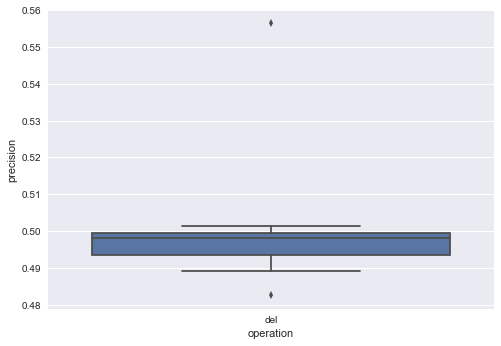

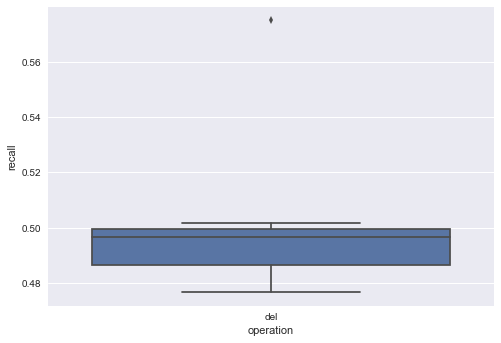

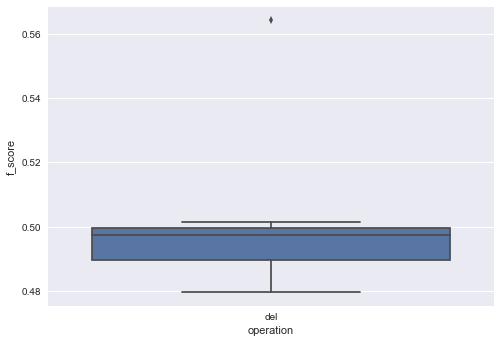

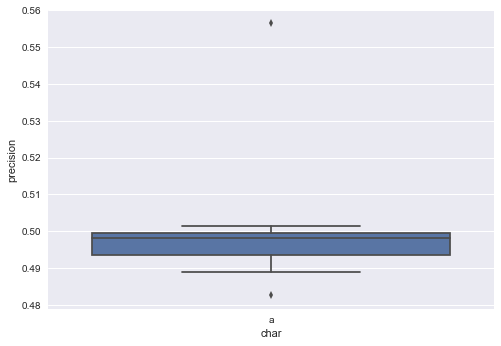

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Model-wise boxplots for full-length bitstrings')
plt.clf()
box_plot = sns.boxplot(x='operation', y='precision', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='recall', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='f_score', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='char', y='precision', data=prf_df)
display(box_plot.get_figure())

In [ ]:
# Load graphs of classifiers
import pickle
import os
from sklearn import tree
LABELS_PATH = 'data/task1/output/labels/'
labels = pickle.load(open(LABELS_PATH + 'polish-train-high.p', 'rb'))
clf_path = 'data/task1/output/prediction/polish-train-high/'
features = pickle.load(open('feature_map_polish.p', 'rb')).keys()
dtrees = [pickle.load(open(clf_path + clf, 'rb')) for clf in os.listdir(clf_path)]
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' not in t:
        continue
    tree.export_graphviz(dtrees[i], out_file='dotfiles/' + t.replace('.p', '.dot'), feature_names=list(features))

In [ ]:
from subprocess import check_call
for dot_f in os.listdir('dotfiles/'):
    check_call(['dot','-Tpng',('dotfiles/' + dot_f),'-o','pngs/' + dot_f.replace('.dot', '.png')])

In [ ]:
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' in t:
        continue
    feature_importances = dtrees[i].feature_importances_
    
    